## Gathered Notebook

This notebook was generated by the Gather Extension. The intent is that it contains only the code and cells required to produce the same results as the cell originally selected for gathering. Please note that the Python analysis is quite conservative, so if it is unsure whether a line of code is necessary for execution, it will err on the side of including it.

**Please let us know if you are satisfied with what was gathered [here](https://aka.ms/gatherfeedback).**

Thanks

In [45]:
import pandas as pd

In [46]:
import re

In [47]:
df = pd.read_json('./guardian_data.json')

In [48]:
df['text'] = df['text'].replace('\n', '', regex=True)

### Join all the articles

In [49]:
text_list = df["text"].to_list()

all_text = " ".join(text_list)
add_space = re.sub(r'\b\.(?=\w)', ". ", all_text)
print(len(add_space))


82704


In [50]:
with open('alltext.txt', 'w') as f:
    f.write(add_space)


# NLTK

In [55]:
import nltk
from nltk.tokenize import word_tokenize

In [56]:
tokenized_text = word_tokenize(add_space)
pos_text = nltk.pos_tag(tokenized_text)
# nltk.help.upenn_tagset('NN.*')
print(len(pos_text))
pos_text[:20]


15962


[('You', 'PRP'),
 ('will', 'MD'),
 ('read', 'VB'),
 ('the', 'DT'),
 ('grim', 'JJ'),
 ('facts', 'NNS'),
 ('about', 'IN'),
 ('Chanel', 'NNP'),
 ('Sultan', 'NNP'),
 ('’', 'NNP'),
 ('s', 'JJ'),
 ('life', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('minute', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('first', 'JJ'),
 ('let', 'NN'),
 ('’', 'NNP')]

### Delete stop-words

In [57]:
from nltk.corpus import stopwords

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juancarlos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
english_stops = stopwords.words('english')
", ".join(english_stops)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [60]:
stopless_tuples =[]

for tuple in pos_text:
    if tuple[0].lower() not in english_stops:
        stopless_tuples.append(tuple)
print(len(stopless_tuples))
stopless_tuples[:10]

9392


[('read', 'VB'),
 ('grim', 'JJ'),
 ('facts', 'NNS'),
 ('Chanel', 'NNP'),
 ('Sultan', 'NNP'),
 ('’', 'NNP'),
 ('life', 'NN'),
 ('minute', 'NN'),
 (',', ','),
 ('first', 'JJ')]

### cleaning

In [61]:
import string

#### exclude punctuation

In [62]:
clean_vocab = []
exclude = [",", ".","“", "”", "‘", "’" ,"-webkit", "-ms", "flex", "email-", "nowrap", "width:", "height:", "–", "(", ")"]
for tuple in stopless_tuples:
     if tuple[0] not in exclude:
        clean_vocab.append(tuple)
print(len(clean_vocab))
clean_vocab[5000:5050]

7523


[('lists', 'NNS'),
 ('contacts', 'NNS'),
 ('sold', 'VBN'),
 ('system', 'NN'),
 ('range', 'NN'),
 ('authoritarian', 'JJ'),
 ('foreign', 'JJ'),
 ('governments', 'NNS'),
 ('want', 'VBP'),
 ('monitor', 'VB'),
 ('citizens', 'NNS'),
 ('views', 'NNS'),
 ('behaviour', 'NN'),
 ('Phone-tapping', 'NN'),
 ('cyber', 'NN'),
 ('surveillance', 'NN'),
 ('done', 'VBN'),
 ('governments', 'NNS'),
 ('potential', 'JJ'),
 ('actual', 'JJ'),
 ('enemies', 'NNS'),
 ('Remember', 'VB'),
 ('row', 'NN'),
 ('2013', 'CD'),
 ('erupted', 'VBD'),
 ('Barack', 'NNP'),
 ('Obama', 'NNP'),
 ('presidency', 'NN'),
 ('Edward', 'NNP'),
 ('Snowden', 'NNP'),
 ('revealed', 'VBD'),
 ('US', 'NNP'),
 ('National', 'NNP'),
 ('Security', 'NNP'),
 ('Agency', 'NNP'),
 ('listening', 'VBG'),
 ('German', 'NNP'),
 ('chancellor', 'NN'),
 ('Angela', 'NNP'),
 ('Merkel', 'NNP'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('conversations', 'NNS'),
 ('years', 'NNS'),
 ('Germans', 'NNPS'),
 ('almost', 'RB'),
 ('embarrassed', 'JJ'),
 ('Americans', 'NNPS'),


#### Some "words" are numbers. Exclude those.

In [63]:
vocab_no_ints = [ tuple for tuple in clean_vocab if not any(char.isdigit() for char in tuple[0]) ]

len(vocab_no_ints)

7379

### Count the instances of each word

In [64]:
counts = {}

for tuple in vocab_no_ints:
    if tuple in counts:
        counts[tuple] += 1
    else:
        counts[tuple] = 1


#### add the count number to each word tuple

In [65]:

final_vocab = [(tuple[0], count, tuple[1]) for tuple, count in counts.items()]
print(len(final_vocab))

3762


In [66]:
final_vocab[:20]

[('read', 2, 'VB'),
 ('grim', 2, 'JJ'),
 ('facts', 2, 'NNS'),
 ('Chanel', 3, 'NNP'),
 ('Sultan', 14, 'NNP'),
 ('life', 10, 'NN'),
 ('minute', 2, 'NN'),
 ('first', 16, 'JJ'),
 ('let', 2, 'NN'),
 ('talk', 3, 'NN'),
 ('dreams', 4, 'NNS'),
 ('Like', 9, 'IN'),
 ('law', 4, 'NN'),
 ('degree', 3, 'NN'),
 ('started', 3, 'VBN'),
 ('hope', 2, 'NN'),
 ('buy', 2, 'VB'),
 ('home', 14, 'NN'),
 ('years', 24, 'NNS'),
 ('spent', 2, 'VBD')]

In [67]:
vocabulary_df = pd.DataFrame(final_vocab, columns=['Word', 'Count', 'POS'])
vocabulary_df.head(10)

,Word,Count,POS
0,read,2,VB
1,grim,2,JJ
2,facts,2,NNS
3,Chanel,3,NNP
4,Sultan,14,NNP
5,life,10,NN
6,minute,2,NN
7,first,16,JJ
8,let,2,NN
9,talk,3,NN


### Add a full description of the POS tags

In [68]:
tag_map = {'CC': 'coordinating conjunction',
           'CD': 'cardinal digit',
           'DT': 'determiner',
           'EX': 'existential there',
           'FW': 'foreign word',
           'IN': 'preposition or subordinating conjunction',
           'JJ': 'adjective',
           'JJR': 'adjective, comparative',
           'JJS': 'adjective, superlative',
           'LS': 'list marker',
           'MD': 'modal',
           'NN': 'noun, singular or mass', 
           'NNS': 'noun, plural',
           'NNP': 'proper noun, singular',
           'NNPS': 'proper noun, plural',
           'PDT': 'predeterminer',
           'POS': 'possessive ending',
           'PRP': 'personal pronoun',
           'PRP$': 'possessive pronoun',
           'RB': 'adverb',
           'RBR': 'adverb, comparative',
           'RBS': 'adverb, superlative',
           'RP': 'particle',
           'SYM': 'symbol',
           'TO': 'to',
           'UH': 'interjection',
           'VB': 'verb, base form', 
           'VBD': 'verb, past tense',
           'VBG': 'verb, gerund or present participle',
           'VBN': 'verb, past participle',
           'VBP': 'verb, non-3rd person singular present',
           'VBZ': 'verb, 3rd person singular present',
           'WDT': 'wh-determiner',
           'WP': 'wh-pronoun',
           'WP$': 'possessive wh-pronoun',
           'WRB': 'wh-adverb'}

In [69]:
vocabulary_df['Part_of_Speech'] = vocabulary_df['POS'].map(tag_map)
vocabulary_df.tail(10)

,Word,Count,POS,Part_of_Speech
3752,deal,1,NN,"noun, singular or mass"
3753,opened,1,VBN,"verb, past participle"
3754,lies,1,VBZ,"verb, 3rd person singular present"
3755,Minnie,1,NNP,"proper noun, singular"
3756,Degawan,1,NNP,"proper noun, singular"
3757,Kakaney/Igorot,1,NNP,"proper noun, singular"
3758,activist,1,NN,"noun, singular or mass"
3759,International,1,NNP,"proper noun, singular"
3760,Biodiversity,1,NNP,"proper noun, singular"
3761,IIFB,1,NNP,"proper noun, singular"


# Selecting which parts of speech to use or exclude:
Challenges:
- many if not most tags ascribed to words in this list, are context dependent
- in the list as I have created, I can see nouns that can also be verbs. So for example 'talk' can be listed as both.
- Proper nouns may include titles or honorifics such as "Sultan"
- A word count is a count for a word as a specific part of speech, therefore a word like read appears three times as 
  - read	2	VB	verb, base form
  - read	1	NN	noun, singular or mass
  - read	1	VBP	verb, non-3rd person singular present
  

## Selecting only for noun, verbs, and adjectives

In [101]:
NVA_df = vocabulary_df[
    (vocabulary_df['POS'] == 'NN') | (vocabulary_df['POS'] == 'NNS')| (vocabulary_df['POS'] == 'NNP')| (vocabulary_df['POS'] == 'NNPS')
    | (vocabulary_df['POS'] == 'JJ') | (vocabulary_df['POS'] == 'JJR')| (vocabulary_df['POS'] == 'JJS')
    | (vocabulary_df['POS'] == 'VB') | (vocabulary_df['POS'] == 'VBD')| (vocabulary_df['POS'] == 'VBG')
    | (vocabulary_df['POS'] == 'VBN') | (vocabulary_df['POS'] == 'VBP')| (vocabulary_df['POS'] == 'VBZ')
             ]
len(NVA_df)
NVA_df


,Word,Count,POS,Part_of_Speech
0,read,2,VB,"verb, base form"
1,grim,2,JJ,adjective
2,facts,2,NNS,"noun, plural"
3,Chanel,3,NNP,"proper noun, singular"
4,Sultan,14,NNP,"proper noun, singular"
...,...,...,...,...
3757,Kakaney/Igorot,1,NNP,"proper noun, singular"
3758,activist,1,NN,"noun, singular or mass"
3759,International,1,NNP,"proper noun, singular"
3760,Biodiversity,1,NNP,"proper noun, singular"


### Save to .xlsx format to visualise in Tableau

In [72]:

NVA_df.to_excel("NVA_wordlist.xlsx")


ModuleNotFoundError: No module named 'openpyxl'

### Collect words and export to use in creating a word cloud

In [73]:
wordList = []
for word in NVA_df['Word']:
    if word not in wordList:
        wordList.append(word.strip())
    else: continue


#### join the words in a single string and export

In [74]:
join_wordList =" ".join(wordList)
join_wordList_df = pd.DataFrame({'text' : [join_wordList]})
join_wordList_df.to_csv('word_list.txt', index=False, header=False)


## Word Cloud

In [75]:
import pathlib
import os 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [76]:
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image 
%matplotlib inline

In [77]:
path = pathlib.Path.cwd()/'word_list.txt'
imgpath = pathlib.Path.cwd()/"g.png"

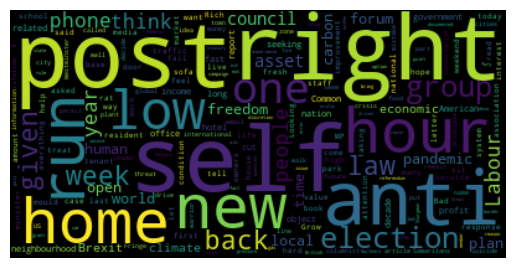

In [95]:
text = path.read_text()
mask =np.array(Image.open("glogo.png"))

wordcloud = WordCloud().generate(text)

# show
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("figures/g.png", dpi=600, facecolor='w', format='png')
# plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.show()


# Categorizing word counts

- which categories are most common
- what is the word count of each word per category
- which words are most helpful, highest or lowest count

In [79]:
NVA_df

,Word,Count,POS,Part_of_Speech
0,read,2,VB,"verb, base form"
1,grim,2,JJ,adjective
2,facts,2,NNS,"noun, plural"
3,Chanel,3,NNP,"proper noun, singular"
4,Sultan,14,NNP,"proper noun, singular"
...,...,...,...,...
3757,Kakaney/Igorot,1,NNP,"proper noun, singular"
3758,activist,1,NN,"noun, singular or mass"
3759,International,1,NNP,"proper noun, singular"
3760,Biodiversity,1,NNP,"proper noun, singular"


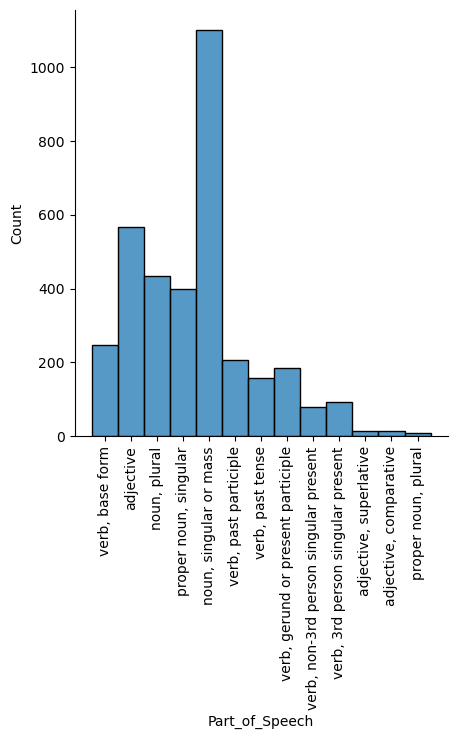

In [94]:
import seaborn as sns
# df = sns.load_dataset("NVA_df")
# sns.pairplot(df, hue="Part_of_Speech")
sns.displot(NVA_df, x='Part_of_Speech')
plt.xticks(rotation=90)
plt.savefig("figures/POS.png", dpi=600, facecolor='w', format='png')


## So which are the nouns in the text?

In [117]:
noun_df = NVA_df[NVA_df['Part_of_Speech'] == 'noun, singular or mass']
noun_df.sort_values('Count').head(50)

,Word,Count,POS,Part_of_Speech
1717,phase,1,NN,"noun, singular or mass"
2185,refuge,1,NN,"noun, singular or mass"
2187,rest,1,NN,"noun, singular or mass"
2197,parallel,1,NN,"noun, singular or mass"
2204,choose,1,NN,"noun, singular or mass"
2213,limbo,1,NN,"noun, singular or mass"
2223,penury,1,NN,"noun, singular or mass"
2226,drain,1,NN,"noun, singular or mass"
2228,Subsistence,1,NN,"noun, singular or mass"
2232,trauma,1,NN,"noun, singular or mass"


## Which of these words coincide with the COCA corpus word frequency data?

### what does the data look like?

In [139]:
df = pd.read_excel("files/words_219k.xlsx")
df

,rank,word,freq,#texts,%caps,blog,web,TVM,spok,fic,...,news,acad,blogPM,webPM,TVMPM,spokPM,ficPM,magPM,newsPM,acadPM
0,15,a,21889251,477421,0.05,2783458,2827106,2519099,2716641,2749208,...,2959649,2229222,22401.41,21981.44,19669.01,21537.47,23234.95,24619.48,24310.83,18609.35
1,15,he,6469768,331701,0.30,519982,638937,913045,975180,1671986,...,871382,227210,4184.84,4967.89,7129.01,7731.21,14130.80,5171.18,7157.61,1896.73
2,25,but,4603799,414960,0.36,659768,598168,590466,729227,658063,...,524492,295774,5309.85,4650.90,4610.33,5781.30,5561.62,4344.45,4308.23,2469.09
3,35,my,3107804,258460,0.15,457496,367843,871337,297289,630635,...,146382,78961,3681.95,2860.07,6803.36,2356.90,5329.82,2045.04,1202.40,659.16
4,45,if,2710989,359865,0.33,465487,429572,428171,386974,327640,...,226059,157468,3746.26,3340.03,3343.14,3067.92,2769.05,2296.88,1856.87,1314.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21879,218795,yuh-huh,20,12,0.90,0,0,14,0,2,...,0,0,0.00,0.00,0.11,0.00,0.02,0.00,0.00,0.00
21880,218805,zaretsky,20,15,1.00,1,0,0,0,2,...,3,14,0.01,0.00,0.00,0.00,0.02,0.00,0.02,0.12
21881,218815,zennie,20,9,0.20,17,0,0,2,0,...,1,0,0.14,0.00,0.00,0.02,0.00,0.00,0.01,0.00
21882,218825,zisk,20,10,0.95,1,4,2,0,0,...,10,2,0.01,0.03,0.02,0.00,0.00,0.00,0.08,0.02


### Match words in both dataframes:

In [144]:
matches =[]
for each in noun_df["Word"]:
    find = each
    for each in df['word']:
        match = each
        if match == find:
            matches.append(find)
len(matches)            
matches
    

['day',
 'gym',
 'read',
 'door',
 'housing',
 'work',
 'girl',
 'sorry',
 'couple',
 'board',
 'piece',
 'treat',
 'furlough',
 'entrepreneur',
 'threat',
 'leisure',
 'assault',
 'surveillance',
 'part',
 'room',
 'disbelief',
 'guerrilla',
 'interview',
 'concentration',
 'la',
 'quart',
 'oppression',
 'design',
 'dependence',
 'membership',
 'growth',
 'satisfaction',
 'discretion',
 'income',
 'ferry',
 'fiasco',
 'absent',
 'sight',
 'end',
 'journalism',
 'vitriol',
 'misogyny',
 'supply',
 'ideal',
 'competence',
 'journalist',
 'sky',
 'rate',
 'number',
 'finance',
 'abortion',
 'month',
 'wake',
 'balloon',
 'lot',
 'footage',
 'heard',
 'event',
 'phenomena',
 'contact',
 'cost',
 'use',
 'knowledge',
 'creation',
 'lifeline',
 'confusion',
 'conformity',
 'vacuum',
 'poisoning',
 'spite',
 'security',
 'benefit',
 'intelligence-gathering',
 'history',
 'enough',
 'flurry',
 'rejection',
 'perspective',
 'desire',
 'household',
 'contrast',
 'monster',
 'intersect',
 'elec

# todo

- new df with the matching words
- find phrasal verbs

```python
# Example text
text = "The cat jumped over the fence and landed on the other side."

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Part-of-speech tag the tokens
tagged_tokens = nltk.pos_tag(tokens)

# Find prepositional verb phrases
phrases = []
for i in range(len(tagged_tokens) - 2):
    if (tagged_tokens[i][1].startswith('V') and tagged_tokens[i+1][1] == 'IN') or (tagged_tokens[i][1].startswith('V') and tagged_tokens[i+2][1] == 'IN'):
        phrases.append(tagged_tokens[i:i+3])

# Print the phrases
for phrase in phrases:
    print(' '.join([t[0] for t in phrase]))
    ```